## Graph Notes 4/2/2025

#### A graph is a network of vertices and edges.

#### Types of Graphs:

- directed vs undirected
- weighted vs unweighted
- connected vs disconnected
- complete vs incomplete

#### Degree of a vertex = number of edges incident on it

#### Eulerian cycle: start from any vertex and visit every edge just once and return to the starting vertex. The degree of all the vertices must be even.

#### Hamiltonian Cycle: Start from any vertex and visit every vertex just once and return to the starting vertex.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
G = nx.read_gml('./files/karate.gml', label='id')

In [5]:
print(G)

Graph with 34 nodes and 78 edges


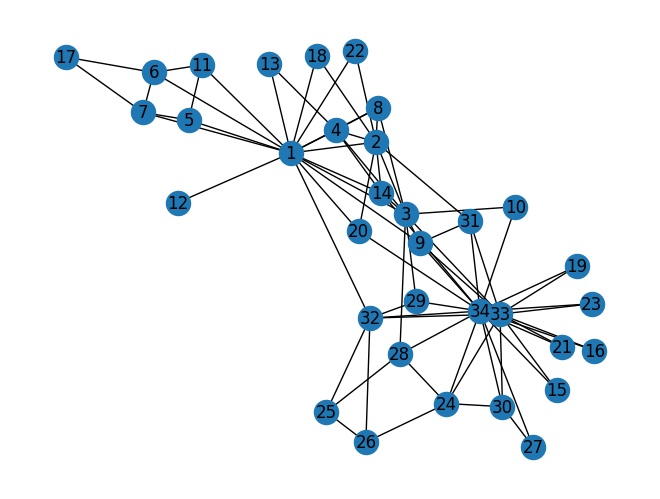

In [6]:
nx.draw(G, with_labels= True)

In [7]:
# import pyviz
from pyvis.network import Network

In [13]:
# Create the Graph object
net = Network(
    notebook=True,
    width=1000,
    height=600,
    cdn_resources='in_line',
)

# Load the graph
net.from_nx(G)

# Generate HTML content
html_content = net.html

# Write HTML file with UTF-8 encoding
with open('test.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

# Display the file in Jupyter Notebook (optional)
from IPython.display import display, HTML
display(HTML('test.html'))


In [14]:
print(G.nodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [15]:
print(G.edges)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22), (2, 31), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33), (4, 8), (4, 13), (4, 14), (5, 7), (5, 11), (6, 7), (6, 11), (6, 17), (7, 17), (9, 31), (9, 33), (9, 34), (10, 34), (14, 34), (15, 33), (15, 34), (16, 33), (16, 34), (19, 33), (19, 34), (20, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 26), (24, 28), (24, 30), (24, 33), (24, 34), (25, 26), (25, 28), (25, 32), (26, 32), (27, 30), (27, 34), (28, 34), (29, 32), (29, 34), (30, 33), (30, 34), (31, 33), (31, 34), (32, 33), (32, 34), (33, 34)]


In [ ]:
# neighbors of node 1
print(list(G.neighbors(1)))

[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]


In [18]:
# degree of centrality = # of neighbors / of neighbors in a complete graph
print(nx.degree_centrality(G))

{1: 0.48484848484848486, 2: 0.2727272727272727, 3: 0.30303030303030304, 4: 0.18181818181818182, 5: 0.09090909090909091, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.12121212121212122, 9: 0.15151515151515152, 10: 0.06060606060606061, 11: 0.09090909090909091, 12: 0.030303030303030304, 13: 0.06060606060606061, 14: 0.15151515151515152, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.06060606060606061, 20: 0.09090909090909091, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.06060606060606061, 24: 0.15151515151515152, 25: 0.09090909090909091, 26: 0.09090909090909091, 27: 0.06060606060606061, 28: 0.12121212121212122, 29: 0.09090909090909091, 30: 0.12121212121212122, 31: 0.12121212121212122, 32: 0.18181818181818182, 33: 0.36363636363636365, 34: 0.5151515151515151}


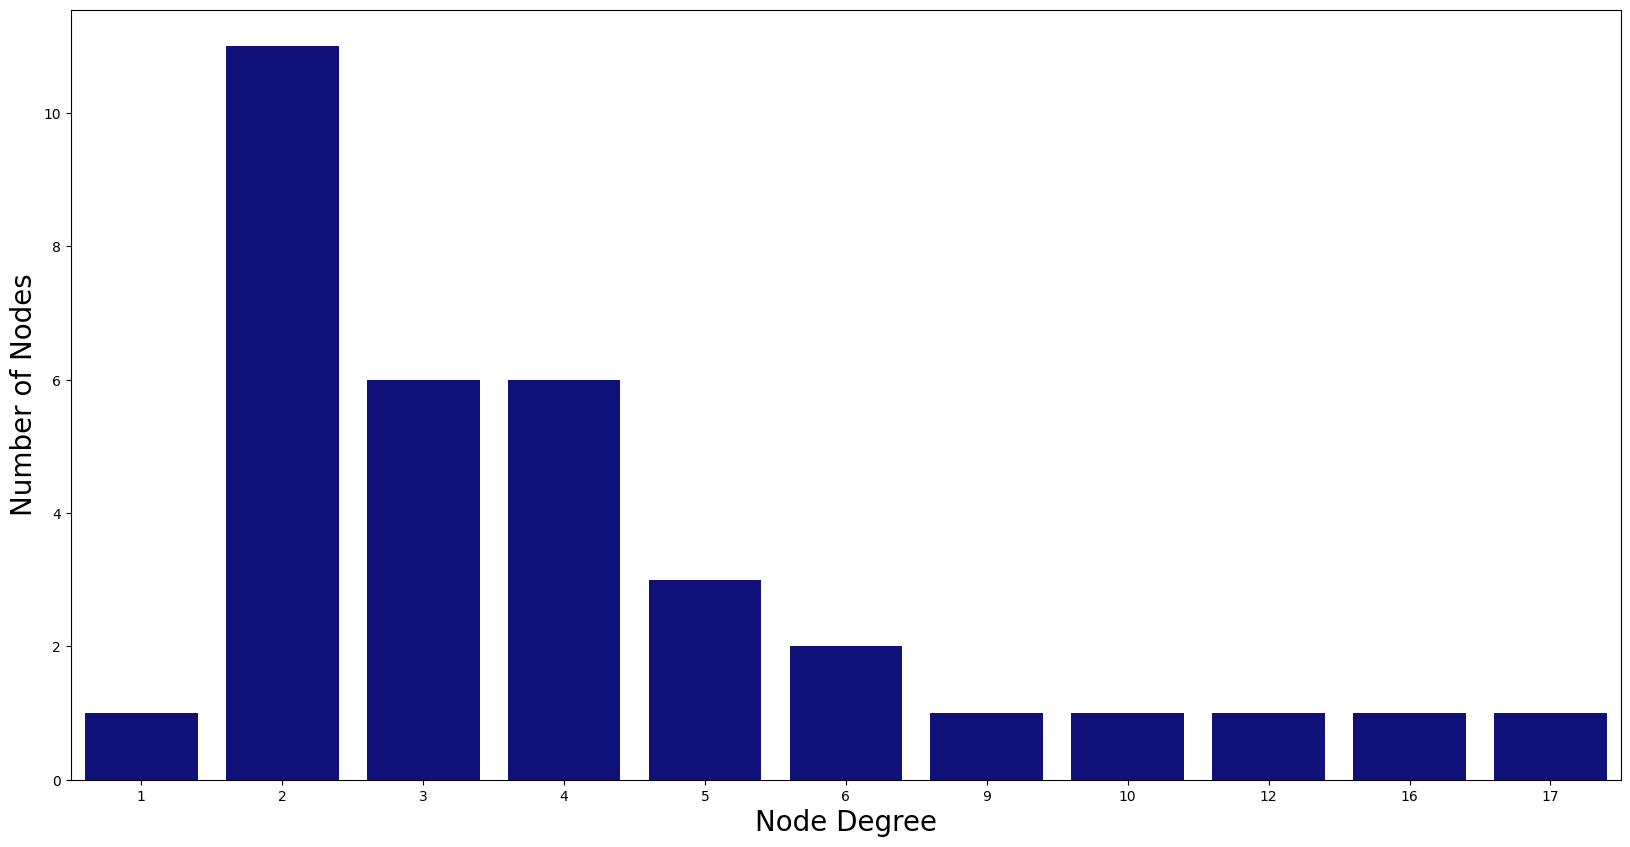

In [20]:
from collections import Counter

degree_count = Counter(dict(G.degree()).values())
degree_hist = pd.DataFrame({'degree': list(degree_count.values()),
                            'Number of Nodes': list(degree_count.keys())
                            })

plt.figure(figsize= (20, 10))
sns.barplot(y= 'degree',
            x= 'Number of Nodes',
            data = degree_hist,
            color= 'darkblue',
            )
plt.xlabel('Node Degree', fontsize= 20)
plt.ylabel('Number of Nodes', fontsize= 20)
plt.show()

In [21]:
# define a function that gives nodes with m neighbors

def nodes_mnbrs(G, m):
    nodes = set()
    for n in G.nodes():
        if (len(list(G.neighbors(n))) == m):
            nodes.add(n)
    return nodes

In [ ]:
# print the nodes of a given degree
print(nodes_mnbrs(G, 3))

{5, 11, 20, 25, 26, 29}


In [23]:
# print the density of edges
# density of edges = number of edges in the graph / number of edges in a complete graph
print(nx.density(G))

0.13903743315508021


In [24]:
# shortest path = minimum number of edges to go from one node to another
# average shortest path

print(nx.average_shortest_path_length(G))

2.408199643493761


In [26]:
# diameter of a graph = maximum distance between any two vertices
print(nx.diameter(G))

5


In [27]:
# node connectivity = minimum number of nodes that have to be removed in order to cause a disconnect
print(nx.node_connectivity(G))

1


In [29]:
# betweenness centrality = fraction of all the shortest paths passing through the node
# measures the extent to which a vertex lies on paths between other vertices

# "How important a vertex is"

between = nx.betweenness_centrality(G)

print(between)

{1: 0.43763528138528146, 2: 0.053936688311688304, 3: 0.14365680615680618, 4: 0.011909271284271283, 5: 0.0006313131313131313, 6: 0.02998737373737374, 7: 0.029987373737373736, 8: 0.0, 9: 0.05592682780182781, 10: 0.0008477633477633478, 11: 0.0006313131313131313, 12: 0.0, 13: 0.0, 14: 0.04586339586339586, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.03247504810004811, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.017613636363636363, 25: 0.0022095959595959595, 26: 0.0038404882154882154, 27: 0.0, 28: 0.02233345358345358, 29: 0.0017947330447330447, 30: 0.0029220779220779218, 31: 0.014411976911976909, 32: 0.13827561327561325, 33: 0.145247113997114, 34: 0.30407497594997596}


In [30]:
print(max(between.values()))

0.43763528138528146


In [31]:
print(min(between.values()))

0.0


In [32]:
print(max(between, key= between.get))

1


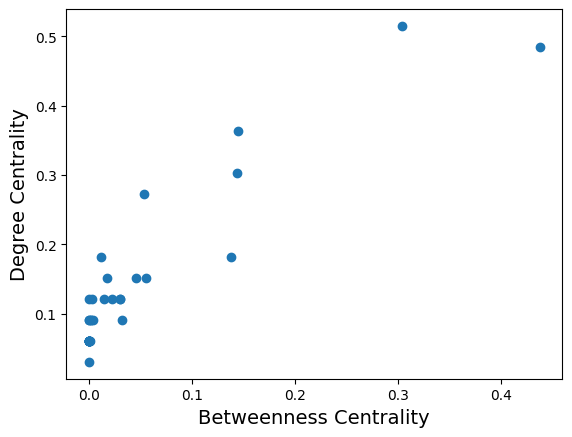

In [33]:
# plot betweenness centrality and degree centrality
bet_cen = nx.betweenness_centrality(G)

deg_cen = nx.degree_centrality(G)

plt.scatter(list(bet_cen.values()), list(deg_cen.values()))
plt.xlabel("Betweenness Centrality", fontsize= 14)
plt.ylabel("Degree Centrality", fontsize= 14)
plt.show()

In [34]:
# clique = subset of a graph where every node is connected to every other node
g_cliques = list(nx.find_cliques(G))
print(g_cliques)

[[1, 32], [1, 2, 18], [1, 2, 3, 4, 8], [1, 2, 3, 4, 14], [1, 2, 20], [1, 2, 22], [1, 5, 11], [1, 5, 7], [1, 6, 11], [1, 6, 7], [1, 9, 3], [1, 12], [1, 13, 4], [2, 31], [3, 33, 9], [3, 10], [3, 28], [3, 29], [6, 17, 7], [34, 33, 32], [34, 33, 9, 31], [34, 33, 15], [34, 33, 16], [34, 33, 19], [34, 33, 21], [34, 33, 23], [34, 33, 24, 30], [34, 10], [34, 14], [34, 20], [34, 27, 30], [34, 28, 24], [34, 29, 32], [25, 32, 26], [25, 28], [26, 24]]


In [35]:
# find cliques of a given size
def max_cliques(G, s):
    mcs = []
    for clique in (nx.find_cliques(G)):
        if (len(clique) == s):
            mcs.append(clique)
    return mcs

In [36]:
# print the cliques of a certain size
print(max_cliques(G, 5))

[[1, 2, 3, 4, 8], [1, 2, 3, 4, 14]]


In [37]:
# find neighbors
nodes = list(G.neighbors(1))
print(nodes)

[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]


In [38]:
nodes.append(1)
G_one = G.subgraph(nodes)
print(G_one)

Graph with 17 nodes and 34 edges


In [ ]:
# draw the subgraph
nx.draw(G_one, with_labels= True)